In [44]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pandas.plotting import parallel_coordinates
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [ ]:
# !pip install networkx

In [2]:
def get_unique_values_of_all_columns(df):
  # returns unique values counts of every column
  unique_values = {}
  for col in df.columns:
    unique_values[col] = df[col].unique()
  return unique_values

In [3]:
# car body and color column instances
body_style_cols = [
    'Coupe', 'Crossover', 'Utility Truck', 'Sedan', 'SUV', 'Hatchback', 
    'Soft Top Convertible', 'Wagon' ,'Van', 'Pick Up Truck', 'Hard Top Convertible', 'Sports Car'
]

color_cols = [
    'Grey', 'Beige', 'Black', 'Blue', 'Brown', 'Burgundy', 'Gold',
      'Green', 'Grey','Orange','Purple','Red','Silver','Tan','Teal',
      'White','Yellow','Other Color'
]

# transforming columns into single attributes
def get_color(row):
    for col in color_cols:
        if row[col] == 1:
            return col
    return 'NoColor'

def get_body_style(row):
    for col in body_style_cols:
        if row[col] == 1:
            return col
    return 'Other_Style'

In [4]:
def apriori_dataset_preparation(df):
    # groups less frequent Makes
    make_counts = df['Make'].value_counts()
    common_makes = make_counts[make_counts > 100].index
    df['Make'] = df['Make'].apply(lambda x: x if x in common_makes else 'Other_Make')

    # groups less frequent Models
    model_counts = df['Model'].value_counts()
    common_models = model_counts[model_counts > 50].index
    df['Model'] = df['Model'].apply(lambda x: x if x in common_models else 'Other_Model')

    # binning year and price attributes to remove continuous values
    df['Year_bin'] = pd.cut(
        df['Year'], 
        bins=[0, 1990, 2000, 2010, 2020, 3000], 
        labels=["<1990", "1990s", "2000s", "2010s", "2020+"]
    )

    df['Price_bin'] = pd.cut(
        df['Price'],
        bins=[0, 10000, 20000, 30000, 40000, float('inf')],
        labels=["0-10k", "10k-20k", "20k-30k", "30k-40k", "40k+"]
    )

    # changing type to strings for apriori readability
    df['Cylinders'] = df['Cylinders'].astype(str)
    df['Transmission'] = df['Transmission'].astype(str)
    df['Fuel Type'] = df['Fuel Type'].astype(str)
    df['BodyStyle'] = df.apply(get_body_style, axis=1)
    df['Color'] = df.apply(get_color, axis=1)
    df['Rank'] = df['Rank'].astype(str)

    # removing redundant columns
    df.drop(columns=color_cols, inplace=True)
    df.drop(columns=body_style_cols, inplace=True)
    df.drop(columns=['Price'], inplace=True)
    df.drop(columns=['Year'], inplace=True)

    # changing format to show columna and corresponding value
    for col in df.columns:
        df[col] = df[col].apply(lambda x: f"{col}={x}")

    # sanity check in making sure dataset is string type
    df = df.astype(str)

    return df

In [5]:
# retrieving preprocessed dataset
df = pd.read_csv('../data/preprocessed_data.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,Make,Model,Year,Price,Cylinders,Transmission,Fuel Type,Rank,Coupe,Crossover,...,Grey,Orange,Other Color,Purple,Red,Silver,Tan,Teal,White,Yellow
0,3.375284,0.721931,1.899647,47819,4,1.0,2.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.659975,3.098285,1.381562,61250,4,1.0,2.0,4.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.434631,0.940014,3.108513,31861,4,1.0,2.0,5.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.600628,0.451207,1.899647,110322,4,1.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.375284,2.030430,2.590428,139994,4,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.319951,2.248513,2.245037,273413,6,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9996,0.165998,0.376006,2.935818,80053,4,1.0,2.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9997,3.375284,2.556837,1.554257,183381,6,1.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,2.766626,1.338580,1.899647,40876,4,1.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
# transforming dataset into apriori formatted structure
pre_apriori = apriori_dataset_preparation(df)
pre_apriori

,Make,Model,Cylinders,Transmission,Fuel Type,Rank,Other,Year_bin,Price_bin,BodyStyle,Color
0,Make=3.375283509701245,Model=0.7219305695378264,Cylinders=4,Transmission=1.0,Fuel Type=2.0,Rank=4.0,Other=0.0,Year_bin=<1990,Price_bin=40k+,BodyStyle=Sedan,Color=Black
1,Make=1.6599754965743827,Model=Other_Model,Cylinders=4,Transmission=1.0,Fuel Type=2.0,Rank=4.0,Other=0.0,Year_bin=<1990,Price_bin=40k+,BodyStyle=SUV,Color=Grey
2,Make=Other_Make,Model=Other_Model,Cylinders=4,Transmission=1.0,Fuel Type=2.0,Rank=5.0,Other=0.0,Year_bin=<1990,Price_bin=30k-40k,BodyStyle=Soft Top Convertible,Color=Grey
3,Make=2.600628277966533,Model=0.4512066059611415,Cylinders=4,Transmission=1.0,Fuel Type=2.0,Rank=2.0,Other=0.0,Year_bin=<1990,Price_bin=40k+,BodyStyle=Sedan,Color=Red
4,Make=3.375283509701245,Model=Other_Model,Cylinders=4,Transmission=0.0,Fuel Type=2.0,Rank=2.0,Other=0.0,Year_bin=<1990,Price_bin=40k+,BodyStyle=Pick Up Truck,Color=White
...,...,...,...,...,...,...,...,...,...,...,...
9995,Make=Other_Make,Model=Other_Model,Cylinders=6,Transmission=1.0,Fuel Type=0.0,Rank=2.0,Other=0.0,Year_bin=<1990,Price_bin=40k+,BodyStyle=Sedan,Color=White
9996,Make=0.1659975496574382,Model=Other_Model,Cylinders=4,Transmission=1.0,Fuel Type=2.0,Rank=5.0,Other=0.0,Year_bin=<1990,Price_bin=40k+,BodyStyle=Sedan,Color=Red
9997,Make=3.375283509701245,Model=2.556837433779802,Cylinders=6,Transmission=1.0,Fuel Type=2.0,Rank=2.0,Other=0.0,Year_bin=<1990,Price_bin=40k+,BodyStyle=SUV,Color=White
9998,Make=Other_Make,Model=Other_Model,Cylinders=4,Transmission=1.0,Fuel Type=1.0,Rank=5.0,Other=0.0,Year_bin=<1990,Price_bin=40k+,BodyStyle=Utility Truck,Color=White


In [7]:
pre_apriori.columns

Index(['Make', 'Model', 'Cylinders', 'Transmission', 'Fuel Type', 'Rank',
       'Other', 'Year_bin', 'Price_bin', 'BodyStyle', 'Color'],
      dtype='object')

In [8]:
# sets all unique values to a list
transactions = pre_apriori.apply(lambda row: row.tolist(), axis=1).tolist()
transactions

[['Make=3.375283509701245',
  'Model=0.7219305695378264',
  'Cylinders=4',
  'Transmission=1.0',
  'Fuel Type=2.0',
  'Rank=4.0',
  'Other=0.0',
  'Year_bin=<1990',
  'Price_bin=40k+',
  'BodyStyle=Sedan',
  'Color=Black'],
 ['Make=1.6599754965743827',
  'Model=Other_Model',
  'Cylinders=4',
  'Transmission=1.0',
  'Fuel Type=2.0',
  'Rank=4.0',
  'Other=0.0',
  'Year_bin=<1990',
  'Price_bin=40k+',
  'BodyStyle=SUV',
  'Color=Grey'],
 ['Make=Other_Make',
  'Model=Other_Model',
  'Cylinders=4',
  'Transmission=1.0',
  'Fuel Type=2.0',
  'Rank=5.0',
  'Other=0.0',
  'Year_bin=<1990',
  'Price_bin=30k-40k',
  'BodyStyle=Soft Top Convertible',
  'Color=Grey'],
 ['Make=2.600628277966533',
  'Model=0.4512066059611415',
  'Cylinders=4',
  'Transmission=1.0',
  'Fuel Type=2.0',
  'Rank=2.0',
  'Other=0.0',
  'Year_bin=<1990',
  'Price_bin=40k+',
  'BodyStyle=Sedan',
  'Color=Red'],
 ['Make=3.375283509701245',
  'Model=Other_Model',
  'Cylinders=4',
  'Transmission=0.0',
  'Fuel Type=2.0',
  '

In [9]:
# encodes unique values 
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# displays is exists within instance
transactions_pre_apriori = pd.DataFrame(te_ary, columns=te.columns_)

In [10]:
transactions_pre_apriori

,BodyStyle=Coupe,BodyStyle=Crossover,BodyStyle=Hard Top Convertible,BodyStyle=Hatchback,BodyStyle=Other_Style,BodyStyle=Pick Up Truck,BodyStyle=SUV,BodyStyle=Sedan,BodyStyle=Soft Top Convertible,BodyStyle=Sports Car,...,Price_bin=40k+,Rank=1.0,Rank=2.0,Rank=3.0,Rank=4.0,Rank=5.0,Transmission=0.0,Transmission=1.0,Year_bin=<1990,nan
0,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,True,False,False,True,True,False
1,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,True,False,False,True,True,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,True,False
3,False,False,False,False,False,False,False,True,False,False,...,True,False,True,False,False,False,False,True,True,False
4,False,False,False,False,False,True,False,False,False,False,...,True,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,True,False,False,...,True,False,True,False,False,False,False,True,True,False
9996,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,True,False,True,True,False
9997,False,False,False,False,False,False,True,False,False,False,...,True,False,True,False,False,False,False,True,True,False
9998,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,True,True,False


In [11]:
# execute frequent itemset mining withi apriori algorithm
frequent_itemsets = apriori(transactions_pre_apriori, min_support=0.8, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [12]:
frequent_itemsets

,support,itemsets
0,0.9714,(Fuel Type=2.0)
1,0.9886,(Other=0.0)
2,0.8241,(Price_bin=40k+)
3,0.9626,(Transmission=1.0)
4,0.9483,(Year_bin=<1990)
5,0.9610,"(Fuel Type=2.0, Other=0.0)"
6,0.9396,"(Transmission=1.0, Fuel Type=2.0)"
7,0.9216,"(Year_bin=<1990, Fuel Type=2.0)"
8,0.8149,"(Price_bin=40k+, Other=0.0)"
9,0.9535,"(Transmission=1.0, Other=0.0)"


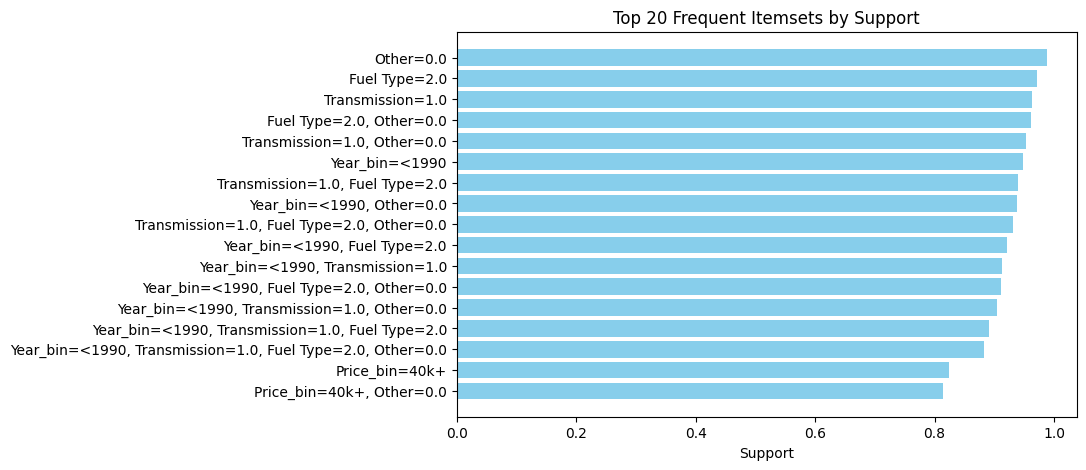

In [29]:
top_n = 20
top_itemsets = frequent_itemsets.nlargest(top_n, 'support').copy()

# 2) Convert frozenset to a readable string for labeling
top_itemsets['itemsets_str'] = top_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))

# 3) Plot
plt.figure(figsize=(8, 5))
plt.barh(top_itemsets['itemsets_str'], top_itemsets['support'], color='skyblue')
plt.gca().invert_yaxis()  # so the highest support is at the top
plt.xlabel('Support')
plt.title(f'Top {top_n} Frequent Itemsets by Support')
plt.show()

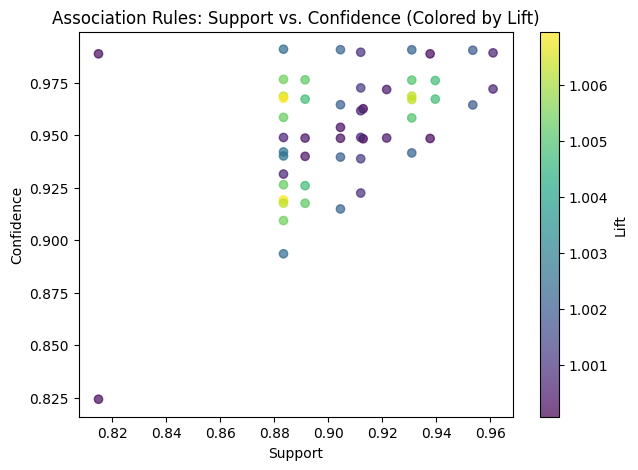

In [30]:
plt.figure(figsize=(7, 5))
scatter = plt.scatter(rules['support'], 
                      rules['confidence'], 
                      c=rules['lift'], 
                      cmap='viridis', 
                      alpha=0.7)

plt.colorbar(scatter, label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs. Confidence (Colored by Lift)')
plt.show()

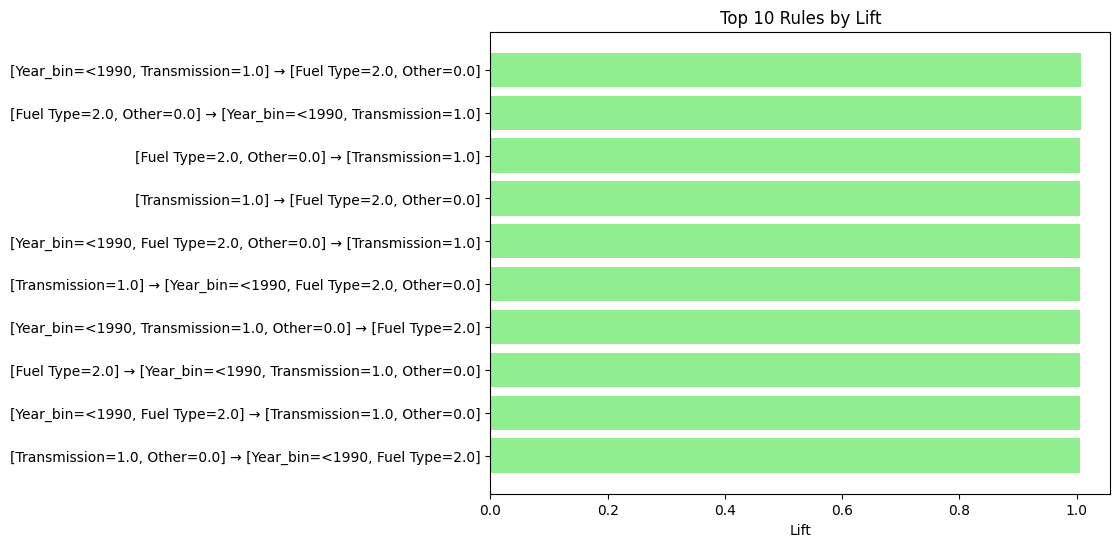

In [33]:
top_n = 10
top_rules = rules.nlargest(top_n, 'lift').copy()

def rule_to_str(row):
    # antecedents/consequents are usually frozensets
    antecedent_str = ', '.join(list(row['antecedents']))
    consequent_str = ', '.join(list(row['consequents']))
    return f"[{antecedent_str}] → [{consequent_str}]"

top_rules['rule_str'] = top_rules.apply(rule_to_str, axis=1)

plt.figure(figsize=(8, 6))
plt.barh(top_rules['rule_str'], top_rules['lift'], color='lightgreen')
plt.gca().invert_yaxis()
plt.xlabel('Lift')
plt.title(f'Top {top_n} Rules by Lift')
plt.show()

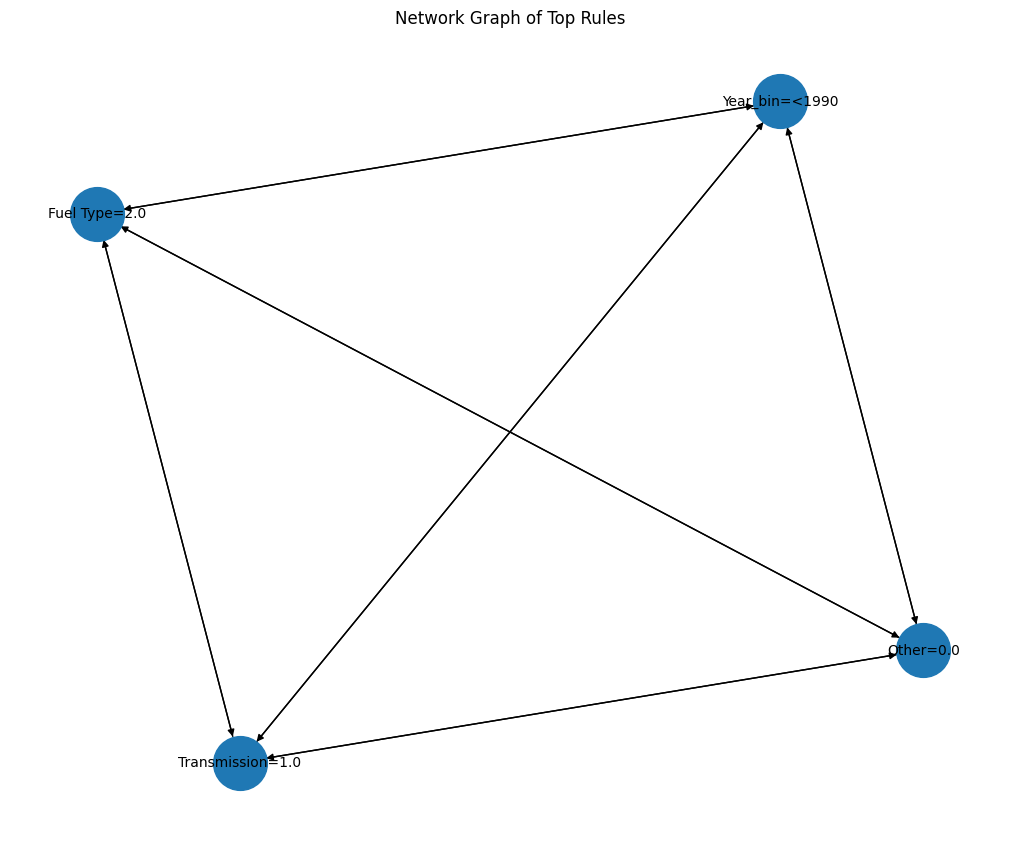

In [42]:
G = nx.DiGraph()

# Add nodes and edges from the top rules
for _, row in top_rules.iterrows():
    ante = list(row['antecedents'])
    cons = list(row['consequents'])
    
    # For each item in the antecedent and consequent, add nodes if not present
    for a_item in ante:
        G.add_node(a_item)
    for c_item in cons:
        G.add_node(c_item)
    
    # Add edges from each antecedent item to each consequent item
    for a_item in ante:
        for c_item in cons:
            # You could store lift or confidence as edge attributes
            G.add_edge(a_item, c_item, lift=row['lift'], confidence=row['confidence'])

# Draw
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.3)  # or another layout
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=10)
plt.title('Network Graph of Top Rules')
plt.show()

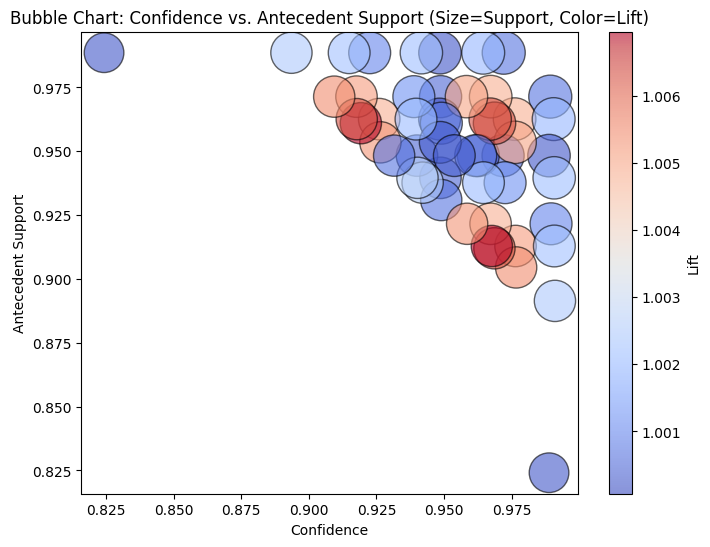

In [51]:
bubble_size = rules['support'] * 1000

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    x=rules['confidence'], 
    y=rules['antecedent support'],
    s=bubble_size,              # bubble size
    c=rules['lift'],            # bubble color
    cmap='coolwarm', 
    alpha=0.6,                  # transparency
    edgecolors='k'
)

plt.colorbar(scatter, label='Lift')
plt.xlabel('Confidence')
plt.ylabel('Antecedent Support')
plt.title('Bubble Chart: Confidence vs. Antecedent Support (Size=Support, Color=Lift)')
plt.show()

In [35]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Fuel Type=2.0),(Other=0.0),0.9714,0.9886,0.9610,0.989294,1.000702,1.0,0.000674,1.064804,0.024521,0.961962,0.060860,0.980688
1,(Other=0.0),(Fuel Type=2.0),0.9886,0.9714,0.9610,0.972082,1.000702,1.0,0.000674,1.024419,0.061519,0.961962,0.023837,0.980688
2,(Transmission=1.0),(Fuel Type=2.0),0.9626,0.9714,0.9396,0.976106,1.004845,1.0,0.004530,1.196972,0.128919,0.944891,0.164559,0.971685
3,(Fuel Type=2.0),(Transmission=1.0),0.9714,0.9626,0.9396,0.967264,1.004845,1.0,0.004530,1.142464,0.168587,0.944891,0.124699,0.971685
4,(Year_bin=<1990),(Fuel Type=2.0),0.9483,0.9714,0.9216,0.971844,1.000457,1.0,0.000421,1.015782,0.008844,0.923354,0.015537,0.960289
5,(Fuel Type=2.0),(Year_bin=<1990),0.9714,0.9483,0.9216,0.948734,1.000457,1.0,0.000421,1.008461,0.015987,0.923354,0.008390,0.960289
6,(Price_bin=40k+),(Other=0.0),0.8241,0.9886,0.8149,0.988836,1.000239,1.0,0.000195,1.021167,0.001359,0.816697,0.020729,0.906567
7,(Other=0.0),(Price_bin=40k+),0.9886,0.8241,0.8149,0.824297,1.000239,1.0,0.000195,1.001121,0.020963,0.816697,0.001120,0.906567
8,(Transmission=1.0),(Other=0.0),0.9626,0.9886,0.9535,0.990546,1.001969,1.0,0.001874,1.205895,0.052540,0.955698,0.170740,0.977521
9,(Other=0.0),(Transmission=1.0),0.9886,0.9626,0.9535,0.964495,1.001969,1.0,0.001874,1.053380,0.172370,0.955698,0.050675,0.977521


In [36]:
# copy so we can add new columns without overwriting
apriori_df_features = transactions_pre_apriori.copy()

for i, row in frequent_itemsets.iterrows():
    itemset = row['itemsets']  # should look similar to this frozenset({'Transmission=1.0', 'Fuel Type=2.0'})
    
    # conversion to list of columns
    columns_for_itemset = list(itemset)  
    
    # giving new name
    new_col_name = f'FIS_{i}'  # or something more descriptive
    
    # checking if all columns in the itemset are present for each row
    apriori_df_features[new_col_name] = apriori_df_features[columns_for_itemset].all(axis=1).astype(int)

# one_hot columns and new features
apriori_df_features.head()

,BodyStyle=Coupe,BodyStyle=Crossover,BodyStyle=Hard Top Convertible,BodyStyle=Hatchback,BodyStyle=Other_Style,BodyStyle=Pick Up Truck,BodyStyle=SUV,BodyStyle=Sedan,BodyStyle=Soft Top Convertible,BodyStyle=Sports Car,...,FIS_7,FIS_8,FIS_9,FIS_10,FIS_11,FIS_12,FIS_13,FIS_14,FIS_15,FIS_16
0,False,False,False,False,False,False,False,True,False,False,...,1,1,1,1,1,1,1,1,1,1
1,False,False,False,False,False,False,True,False,False,False,...,1,1,1,1,1,1,1,1,1,1
2,False,False,False,False,False,False,False,False,True,False,...,1,0,1,1,1,1,1,1,1,1
3,False,False,False,False,False,False,False,True,False,False,...,1,1,1,1,1,1,1,1,1,1
4,False,False,False,False,False,True,False,False,False,False,...,1,1,0,1,0,0,1,0,0,0


In [37]:
transaction_sets = [set(tr) for tr in transactions]

In [38]:
frequent_itemsets_list = frequent_itemsets['itemsets'].tolist()

new_features = {}
for idx, fiset in enumerate(frequent_itemsets_list):
    column_name = " & ".join(sorted(fiset))
    print(f"Column: {column_name}")
    new_features[column_name] = []
    for trans_set in transaction_sets:
        new_features[column_name].append(1 if fiset.issubset(trans_set) else 0)

df_features = pd.DataFrame(new_features)
df_features.head()

Column: Fuel Type=2.0
Column: Other=0.0
Column: Price_bin=40k+
Column: Transmission=1.0
Column: Year_bin=<1990
Column: Fuel Type=2.0 & Other=0.0
Column: Fuel Type=2.0 & Transmission=1.0
Column: Fuel Type=2.0 & Year_bin=<1990
Column: Other=0.0 & Price_bin=40k+
Column: Other=0.0 & Transmission=1.0
Column: Other=0.0 & Year_bin=<1990
Column: Transmission=1.0 & Year_bin=<1990
Column: Fuel Type=2.0 & Other=0.0 & Transmission=1.0
Column: Fuel Type=2.0 & Other=0.0 & Year_bin=<1990
Column: Fuel Type=2.0 & Transmission=1.0 & Year_bin=<1990
Column: Other=0.0 & Transmission=1.0 & Year_bin=<1990
Column: Fuel Type=2.0 & Other=0.0 & Transmission=1.0 & Year_bin=<1990


,Fuel Type=2.0,Other=0.0,Price_bin=40k+,Transmission=1.0,Year_bin=<1990,Fuel Type=2.0 & Other=0.0,Fuel Type=2.0 & Transmission=1.0,Fuel Type=2.0 & Year_bin=<1990,Other=0.0 & Price_bin=40k+,Other=0.0 & Transmission=1.0,Other=0.0 & Year_bin=<1990,Transmission=1.0 & Year_bin=<1990,Fuel Type=2.0 & Other=0.0 & Transmission=1.0,Fuel Type=2.0 & Other=0.0 & Year_bin=<1990,Fuel Type=2.0 & Transmission=1.0 & Year_bin=<1990,Other=0.0 & Transmission=1.0 & Year_bin=<1990,Fuel Type=2.0 & Other=0.0 & Transmission=1.0 & Year_bin=<1990
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0


In [39]:
# retrieving preprocessed dataset
df = pd.read_csv('../data/preprocessed_data.csv')
df = df.drop(columns=['Unnamed: 0'])

In [40]:
# new apriori enhanced preprocessed dataset
df_apriori = pd.concat([df, df_features], axis=1)
df_apriori = df_apriori.drop(columns=color_cols)
df_apriori = df_apriori.drop(columns=body_style_cols)
df_apriori

,Make,Model,Year,Price,Cylinders,Transmission,Fuel Type,Rank,Other,Fuel Type=2.0,...,Fuel Type=2.0 & Year_bin=<1990,Other=0.0 & Price_bin=40k+,Other=0.0 & Transmission=1.0,Other=0.0 & Year_bin=<1990,Transmission=1.0 & Year_bin=<1990,Fuel Type=2.0 & Other=0.0 & Transmission=1.0,Fuel Type=2.0 & Other=0.0 & Year_bin=<1990,Fuel Type=2.0 & Transmission=1.0 & Year_bin=<1990,Other=0.0 & Transmission=1.0 & Year_bin=<1990,Fuel Type=2.0 & Other=0.0 & Transmission=1.0 & Year_bin=<1990
0,3.375284,0.721931,1.899647,47819,4,1.0,2.0,4.0,0.0,1,...,1,1,1,1,1,1,1,1,1,1
1,1.659975,3.098285,1.381562,61250,4,1.0,2.0,4.0,0.0,1,...,1,1,1,1,1,1,1,1,1,1
2,2.434631,0.940014,3.108513,31861,4,1.0,2.0,5.0,0.0,1,...,1,0,1,1,1,1,1,1,1,1
3,2.600628,0.451207,1.899647,110322,4,1.0,2.0,2.0,0.0,1,...,1,1,1,1,1,1,1,1,1,1
4,3.375284,2.030430,2.590428,139994,4,0.0,2.0,2.0,0.0,1,...,1,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.319951,2.248513,2.245037,273413,6,1.0,0.0,2.0,0.0,0,...,0,1,1,1,1,0,0,0,1,0
9996,0.165998,0.376006,2.935818,80053,4,1.0,2.0,5.0,0.0,1,...,1,1,1,1,1,1,1,1,1,1
9997,3.375284,2.556837,1.554257,183381,6,1.0,2.0,2.0,0.0,1,...,1,1,1,1,1,1,1,1,1,1
9998,2.766626,1.338580,1.899647,40876,4,1.0,1.0,5.0,0.0,0,...,0,1,1,1,1,0,0,0,1,0


In [41]:
df_apriori.to_csv('../data/apriori_data.csv')